<a href="https://colab.research.google.com/github/Sanayaghimire/Data_Science/blob/main/copy_of_insurance_dataplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
### IMPORT: ------------------------------------
import scipy.stats as stats #It has all the probability distributions available along with many statistical functions.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
# sns.set(style="darkgrid") # set the background for the graphs
from scipy.stats import skew

# from statsmodels.stats.proportion import proportions_ztest # For proportion Z-test
# from statsmodels.formula.api import ols      # For n-way ANOVA
# from statsmodels.stats.anova import anova_lm # For n-way ANOVA
# from   scipy.stats import chi2_contingency   # For Chi-Sq

# Read and Understand Data

In [ ]:
#Reading the csv file AxisInsurance.csv
df = pd.read_csv('/content/drive/MyDrive/Data_Science/insurance.csv')
insured = df.copy()

In [ ]:
# inspect data, print top 6
insured.head(6)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62


In [ ]:
# bottom 5 rows:
insured.tail(5)

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
insured.info()    #it give information about datatype of different columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insured.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [ ]:
print(insured.shape)
#get the size of dataframe
print ("Rows     : " , insured.shape[0])
print ("Columns  : " , insured.shape[1])


(1338, 7)
Rows     :  1338
Columns  :  7


In [ ]:
insured.isnull()

,age,sex,bmi,children,smoker,region,expenses
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [ ]:
insured.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [ ]:
#count empty value
insured.isnull().sum().values.sum()

0

In [ ]:
# insured[insured['Gender'] == '']

In [ ]:
#drop empty or null value
insured = insured.dropna()

In [ ]:
# seeing total value after dropping empty value
insured.shape

(1338, 7)

In [ ]:
insured.values


array([[19, 'female', 27.9, ..., 'yes', 'southwest', 16884.92],
       [18, 'male', 33.8, ..., 'no', 'southeast', 1725.55],
       [28, 'male', 33.0, ..., 'no', 'southeast', 4449.46],
       ...,
       [18, 'female', 36.9, ..., 'no', 'southeast', 1629.83],
       [21, 'female', 25.8, ..., 'no', 'southwest', 2007.95],
       [61, 'female', 29.1, ..., 'yes', 'northwest', 29141.36]],
      dtype=object)

In [ ]:
print ("\nValues : \n", insured.values)
print ("\nFeatures : \n", list(insured.columns))
# print ("\nFeatures : \n", list(insured.columns.to_list()))

# print ("\nMissing values :  ", insured.isnull().sum().values.sum())

# print ("\nUnique values :  \n", insured.nunique())



Values : 
 [[19 'female' 27.9 ... 'yes' 'southwest' 16884.92]
 [18 'male' 33.8 ... 'no' 'southeast' 1725.55]
 [28 'male' 33.0 ... 'no' 'southeast' 4449.46]
 ...
 [18 'female' 36.9 ... 'no' 'southeast' 1629.83]
 [21 'female' 25.8 ... 'no' 'southwest' 2007.95]
 [61 'female' 29.1 ... 'yes' 'northwest' 29141.36]]

Features : 
 ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses']


In [ ]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#changing object dtype to category  to save memory
insured['sex']=insured['sex'].astype("category")
insured['smoker']=insured['smoker'].astype("category")
insured['region']=insured['region'].astype("category")


In [ ]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   expenses  1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [ ]:
insured.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [ ]:
#EDA = exploratory data analysis

In [ ]:
# get counts of unique observations for each category variable
list_col=  insured.select_dtypes(['category']).columns
list_col


Index(['sex', 'smoker', 'region'], dtype='object')

In [ ]:
# get counts of unique observations for each int variable
list_col1=  insured.select_dtypes(['int']).columns
list_col1


Index(['age', 'children'], dtype='object')

In [ ]:
# get counts of unique observations for each float variable
list_col2=  insured.select_dtypes(['float']).columns
list_col2


Index(['bmi', 'expenses'], dtype='object')

In [ ]:
#counting number of male and female without using value function or using set
cat=set(insured['sex'])
Male_no=len(insured[insured['sex']=='male'])
Female_no=len(insured[insured['sex']=='female'])
print(Male_no)
print(Female_no)

676
662


In [ ]:
# value count


In [ ]:
insured['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
insured['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
insured['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
for i in list_col:
  print(i)

sex
smoker
region


In [ ]:
for i in list_col:
  print(dict(insured[i].value_counts()))

{'male': 676, 'female': 662}
{'no': 1064, 'yes': 274}
{'southeast': 364, 'northwest': 325, 'southwest': 325, 'northeast': 324}


In [ ]:
for i in range(len(list_col)):
    print(insured[list_col[i]].value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


# Exploratory Data Analysis

## Univariate Analysis

In [ ]:
# # Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        plot.annotate(percentage, (x, y), size = 12) # annotate the percentage

In [ ]:
len(insured[insured['sex'] == 'female'])

662

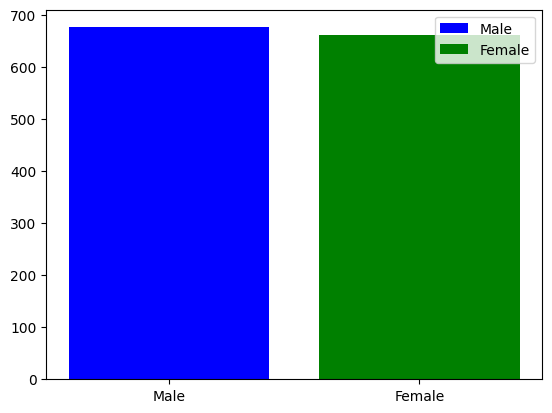

In [ ]:
no_of_male = len(insured[insured['sex'] == 'male'])
no_of_female = len(insured[insured['sex'] == 'female'])

plt.bar(['Male','Female'],[no_of_male,no_of_female],color = ['b','g'],label = ['Male','Female'])
plt.legend()
plt.show()

In [ ]:
plot_data = insured['sex'].value_counts()
plot_data


male      676
female    662
Name: sex, dtype: int64

In [ ]:
plot_data = dict(insured['sex'].value_counts())
print(plot_data)
no_of_male = plot_data['male']
no_of_female = plot_data['female']
print(no_of_male, no_of_female)

{'male': 676, 'female': 662}
676 662


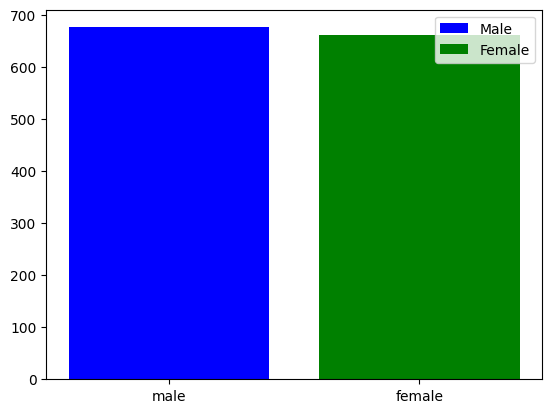

In [ ]:
plot_data = dict(insured['sex'].value_counts())
plot_data
plt.bar(['male','female'],[plot_data['male'],plot_data['female']],color = ['b','g'],label = ['Male','Female'])
plt.legend()
plt.show()

<Axes: >

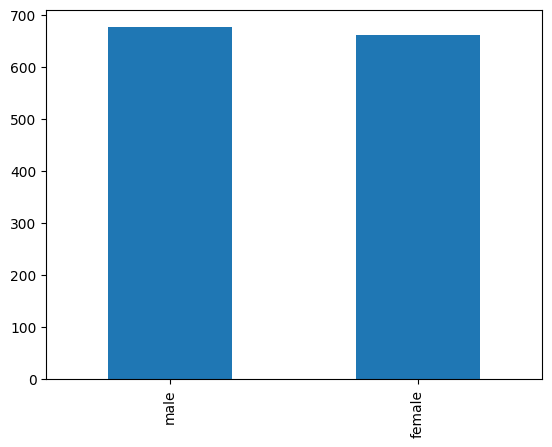

In [ ]:
insured['sex'].value_counts().plot.bar()

<Axes: ylabel='sex'>

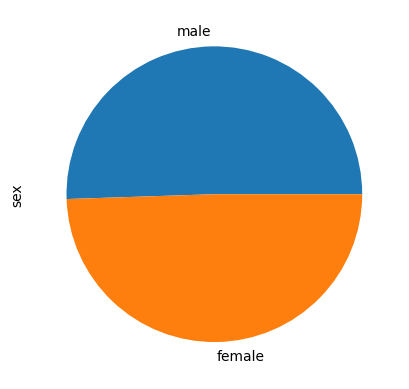

In [ ]:
insured['sex'].value_counts().plot.pie()

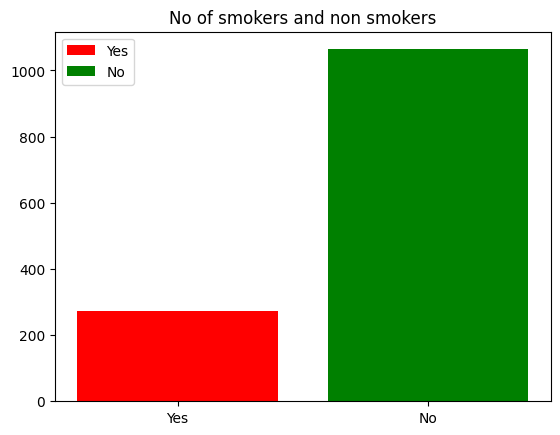

In [ ]:
#Alternet
#for education level
no_of_yes = len(insured[insured['smoker'] == "yes"])
no_of_no = len(insured[insured['smoker'] == "no"])

plt.bar(["Yes","No"],[no_of_yes,no_of_no], color = ['r','g'], label=["Yes","No"])
plt.title('No of smokers and non smokers')
plt.legend()
plt.show()

In [ ]:
plot_data = dict(insured['smoker'].value_counts())
plot_data

{'no': 1064, 'yes': 274}

In [ ]:
key = plot_data.keys()
print(key)
values = plot_data.values()
print(values)

dict_keys(['no', 'yes'])
dict_values([1064, 274])


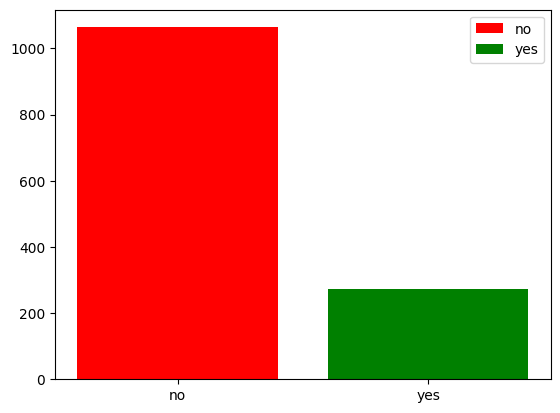

dict_keys(['no', 'yes'])

In [ ]:
plot_data = dict(insured['smoker'].value_counts())
plt.bar(plot_data.keys(),plot_data.values(),color = ['r','g'],label = plot_data.keys())
plt.legend()
plt.show()
plot_data
plot_data.keys()

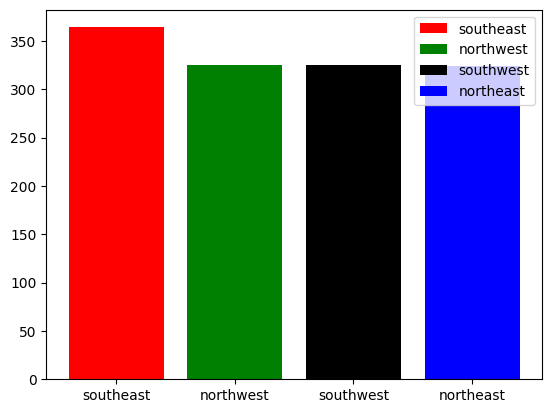

dict_keys(['southeast', 'northwest', 'southwest', 'northeast'])

In [ ]:
plot_data = dict(insured['region'].value_counts())
plt.bar(plot_data.keys(),plot_data.values(),color = ['r','g','k','b'],label = plot_data.keys())
plt.legend()
plt.show()
plot_data
plot_data.keys()

<Axes: >

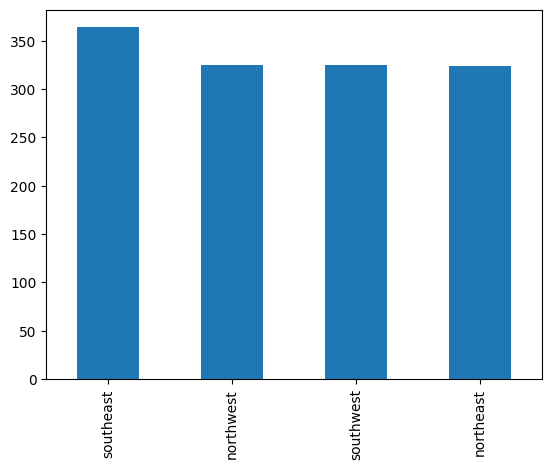

In [ ]:

insured['region'].value_counts().plot.bar()

In [ ]:
# Analyzing categorical data

In [ ]:
data = {}
list_col=  insured.select_dtypes(['category']).columns
for i in range(len(list_col)):
  values = list(insured[list_col[i]].value_counts())
  subcategory = list(insured[list_col[i]].value_counts().index)
  # data['x'] = values
  data[list_col[i]] = [subcategory,values]

data

{'sex': [['male', 'female'], [676, 662]],
 'smoker': [['no', 'yes'], [1064, 274]],
 'region': [['southeast', 'northwest', 'southwest', 'northeast'],
  [364, 325, 325, 324]]}

In [ ]:
# Bar Graph

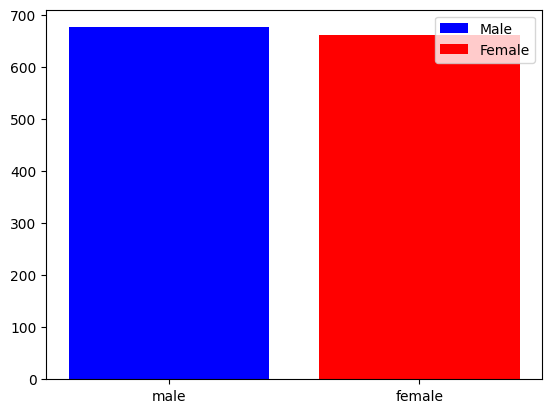

In [ ]:
plt.bar(data['sex'][0],data['sex'][1],label=['Male','Female'],
        color = ['b','r'])
plt.legend()
plt.show()

In [ ]:
# #Alternate
# print(data['region'])
# plt.bar(data['region'][0],data['region'][1],
#         label=['southeast', 'northwest', 'southwest', 'northeast'],
#         color = ['r','b','g','k'])
# plt.title('Region')
# plt.legend()
# plt.show()

[['no', 'yes'], [1064, 274]]


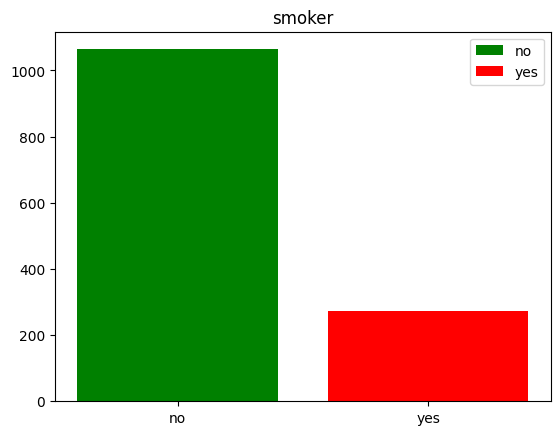

In [ ]:
#Alternate
print(data['smoker'])
plt.bar(data['smoker'][0],data['smoker'][1],
        label=data['smoker'][0],
        color = ['g','r','b'])
plt.title('smoker')
plt.legend()
plt.show()

## Bivariate & Multivariate Analysis

In [ ]:
insured

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [ ]:
corr_insured = insured[['age','children','bmi','expenses']]

In [ ]:
corr_insured.corr()

,age,children,bmi,expenses
age,1.000000,0.042469,0.109341,0.299008
children,0.042469,1.000000,0.012645,0.067998
bmi,0.109341,0.012645,1.000000,0.198576
expenses,0.299008,0.067998,0.198576,1.000000


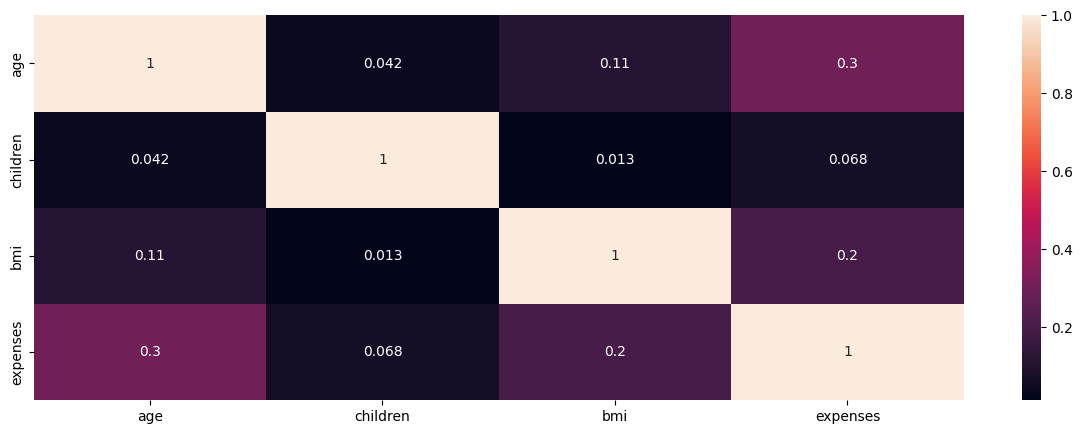

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(corr_insured.corr(),annot=True) # annot le value lekhxa like 0.042
plt.show()

<Figure size 500x500 with 0 Axes>

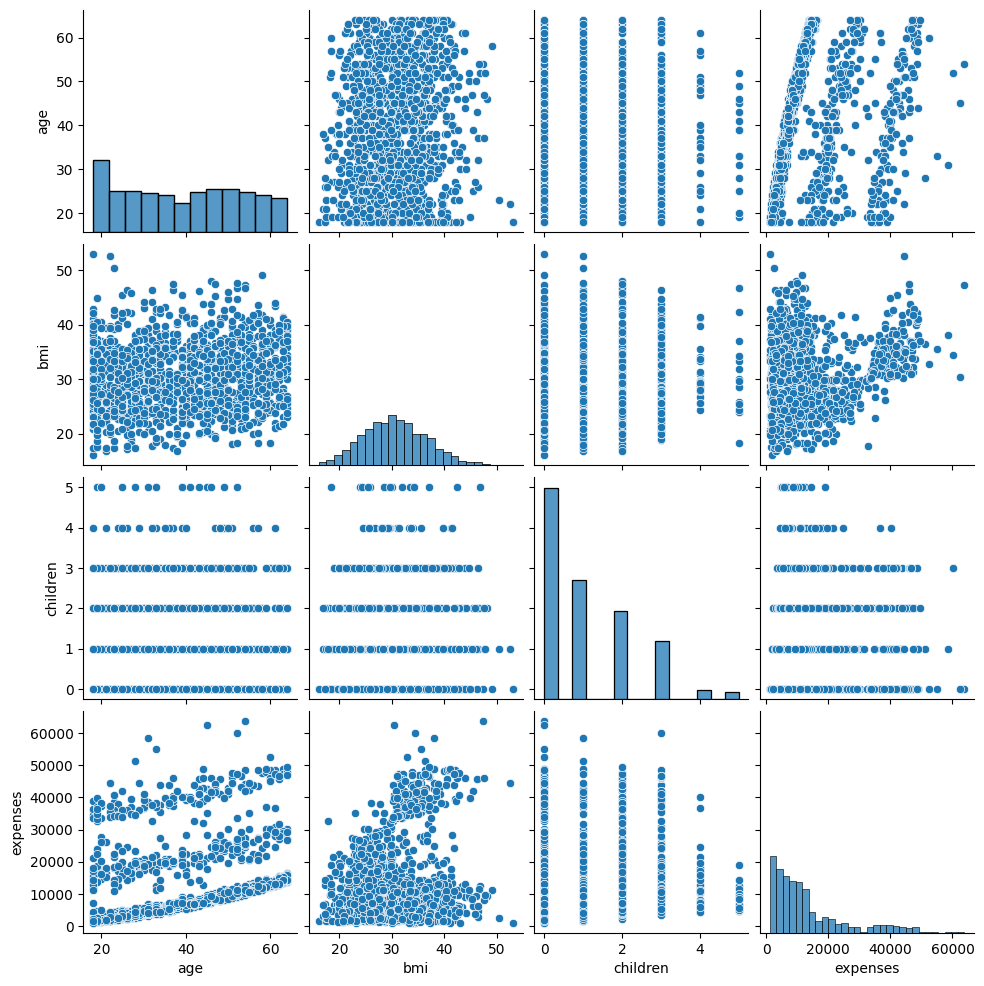

In [ ]:
plt.figure(figsize=(5,5))
sns.pairplot(data=insured)
plt.show()

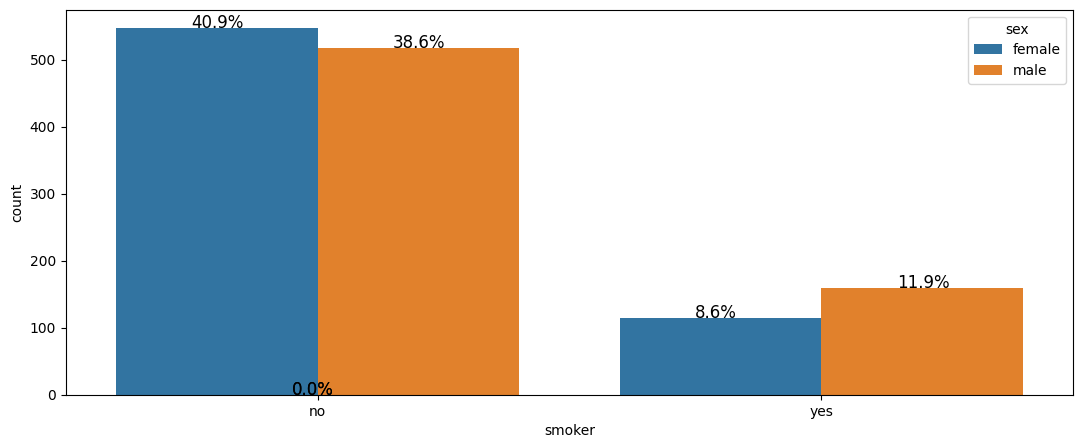

In [ ]:
#Gender count plot
plt.figure(figsize=(13,5))
ax=sns.countplot(x='smoker',hue='sex',data=insured)
bar_perc(ax,insured['smoker'])

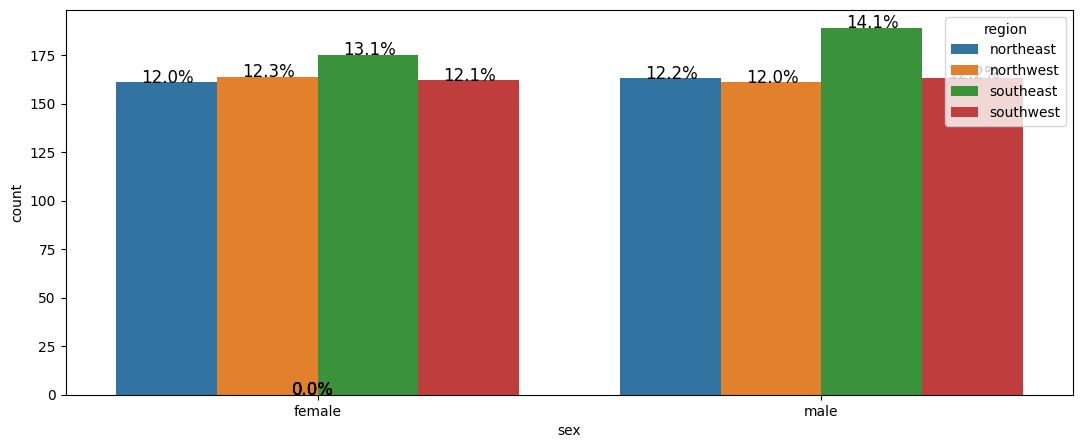

In [ ]:
#Sex vs smoker
plt.figure(figsize=(13,5))
ax=sns.countplot(x='sex',hue='region',data=insured)
bar_perc(ax,insured['region'])


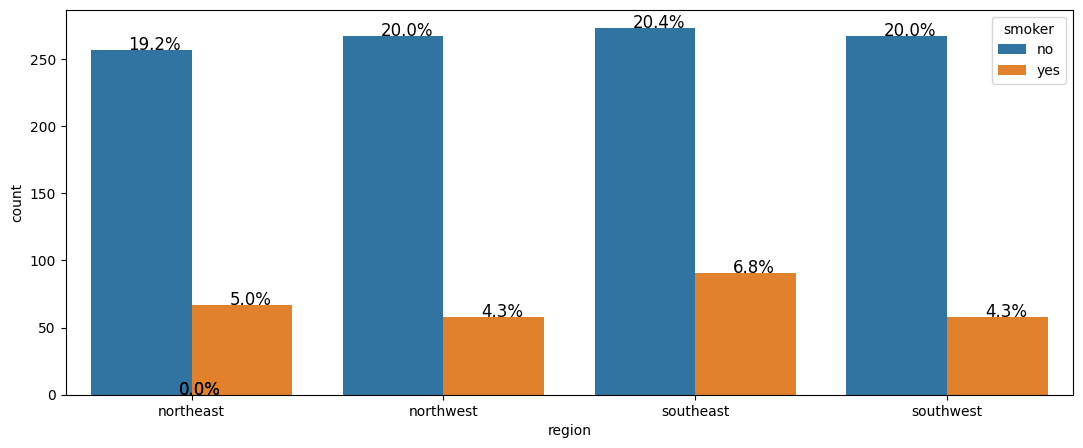

In [ ]:
#Sex vs smoker
plt.figure(figsize=(13,5))
ax=sns.countplot(x='region',hue='smoker',data=insured)
bar_perc(ax,insured['region'])


[Text(0.5, 1.0, 'Smoker vs Expenses')]

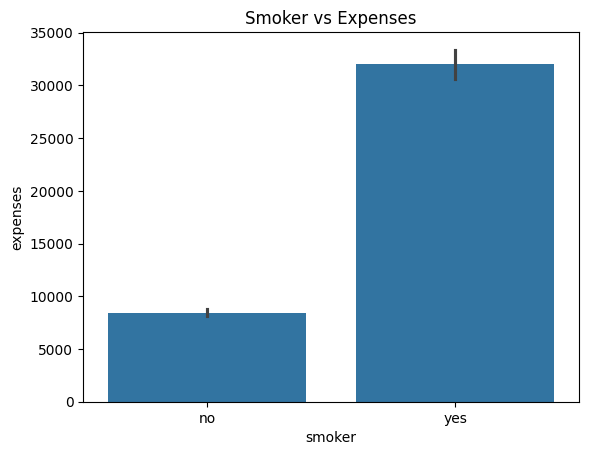

In [ ]:
# #smoker vs Expenses
sns.barplot(x=insured.smoker,y=insured.expenses).set(title="Smoker vs Expenses")

[Text(0.5, 1.0, 'Smoker vs Region')]

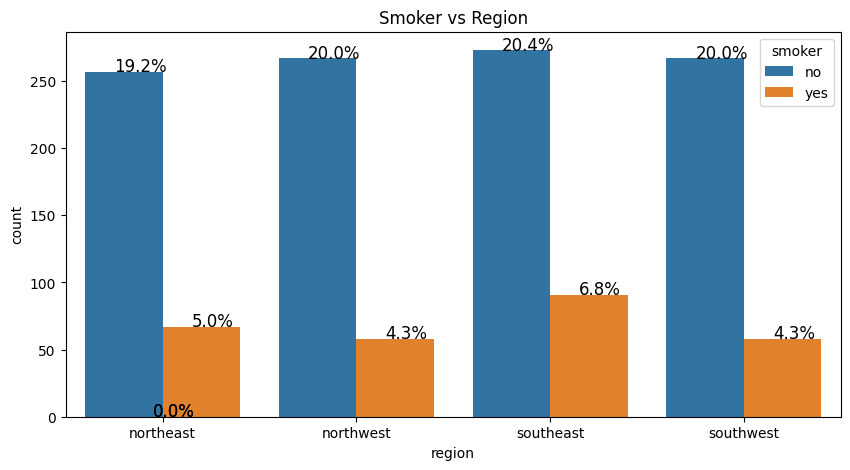

In [ ]:
#region vs smoker
plt.figure(figsize=(10,5))
ax=sns.countplot(x='region',hue='smoker',data=insured)
bar_perc(ax,insured['smoker'])
ax.set(title="Smoker vs Region")

In [ ]:
# #smoker vs region
# plt.figure(figsize=(10,5))
# ax=sns.countplot(x='smoker',hue='region',data=insured)
# bar_perc(ax,insured['region'])
# ax.set(title="Smoker vs Region")

[Text(0.5, 1.0, 'Sex vs Region')]

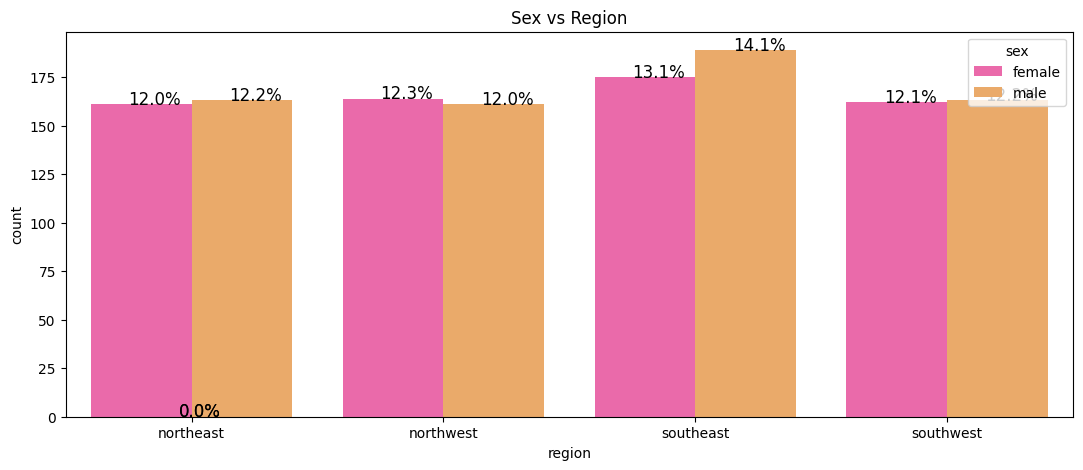

In [ ]:
plt.figure(figsize=(13,5))
ax=sns.countplot(x='region',hue='sex',data=insured,palette='spring')
bar_perc(ax,insured['sex'])
ax.set(title="Sex vs Region")

In [ ]:
insured.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
# GROUP BY

In [ ]:
insured.groupby(insured.sex).expenses.mean()      #GROUP BY BY Gender

sex
female    12569.578897
male      13956.751420
Name: expenses, dtype: float64

In [ ]:
insured.groupby(insured.sex).expenses.sum()      #GROUP BY BY Gender

sex
female    8321061.23
male      9434763.96
Name: expenses, dtype: float64

In [ ]:
#insured.region = if column ma space xaina vanye
#insured['region] = if column name have space e.g region value
insured.groupby(insured['region']).expenses.mean()      #GROUP BY BY Education Level

region
northeast    13406.384691
northwest    12417.575169
southeast    14735.411538
southwest    12346.937908
Name: expenses, dtype: float64

In [ ]:
dict(insured.groupby(insured['region']).expenses.mean())     #GROUP BY BY Education Level

{'northeast': 13406.384691358024,
 'northwest': 12417.57516923077,
 'southeast': 14735.411538461538,
 'southwest': 12346.937907692307}

In [ ]:
list(insured.groupby(insured['region']).expenses.mean())     #GROUP BY BY Education Level

[13406.384691358024, 12417.57516923077, 14735.411538461538, 12346.937907692307]

['northeast', 'northwest', 'southeast', 'southwest']
[13406.384691358024, 12417.57516923077, 14735.411538461538, 12346.937907692307]


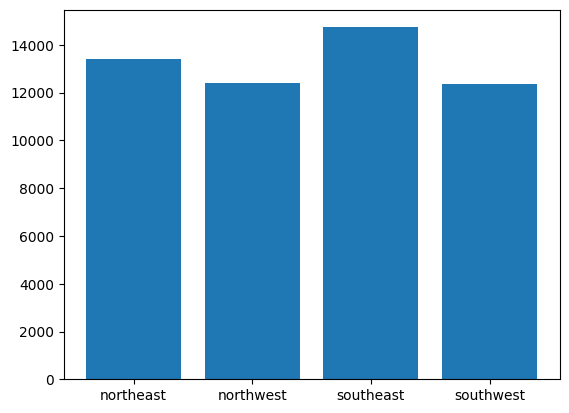

In [ ]:
plot_data = dict(insured.groupby(insured['region']).expenses.mean())
plot_key = list(plot_data.keys())
plot_value = list(plot_data.values())
print(plot_key)
print(plot_value)


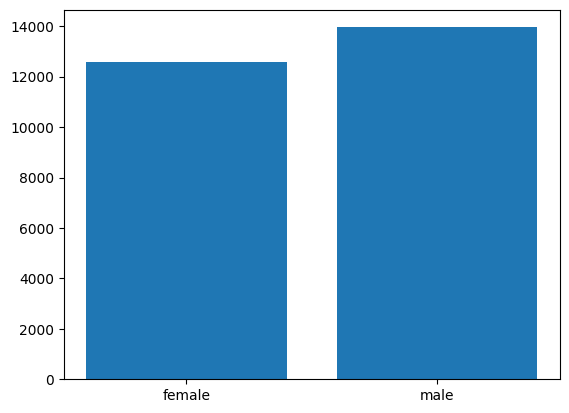

In [ ]:
plot_data = dict(insured.groupby(insured['sex']).expenses.mean())
plot_key = list(plot_data.keys())
plot_value = list(plot_data.values())

plt.bar(plot_key, plot_value)
plt.show()

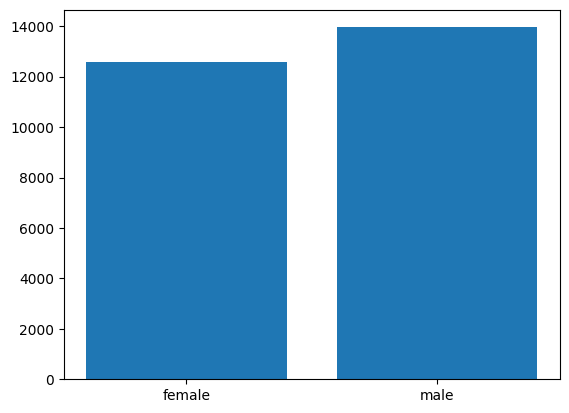

In [ ]:
plot_data = dict(insured.groupby(insured['sex']).expenses.mean())
plt.bar(list(plot_data.keys()), list(plot_data.values()))
plt.show()


[Text(0.5, 1.0, 'Gender Vs Salary')]

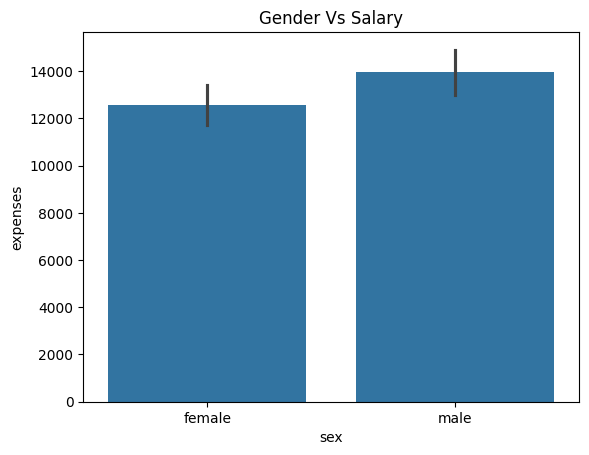

In [ ]:
#Plot of Gender and Salary
sns.barplot(x=insured.sex,y=insured.expenses).set(title='Gender Vs Salary')

[Text(0.5, 1.0, 'region Vs Expenses')]

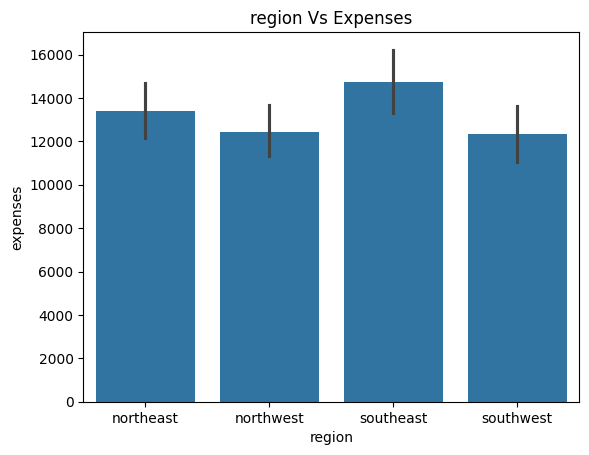

In [ ]:
sns.barplot(x=insured['region'],y=insured.expenses).set(title='region Vs Expenses')

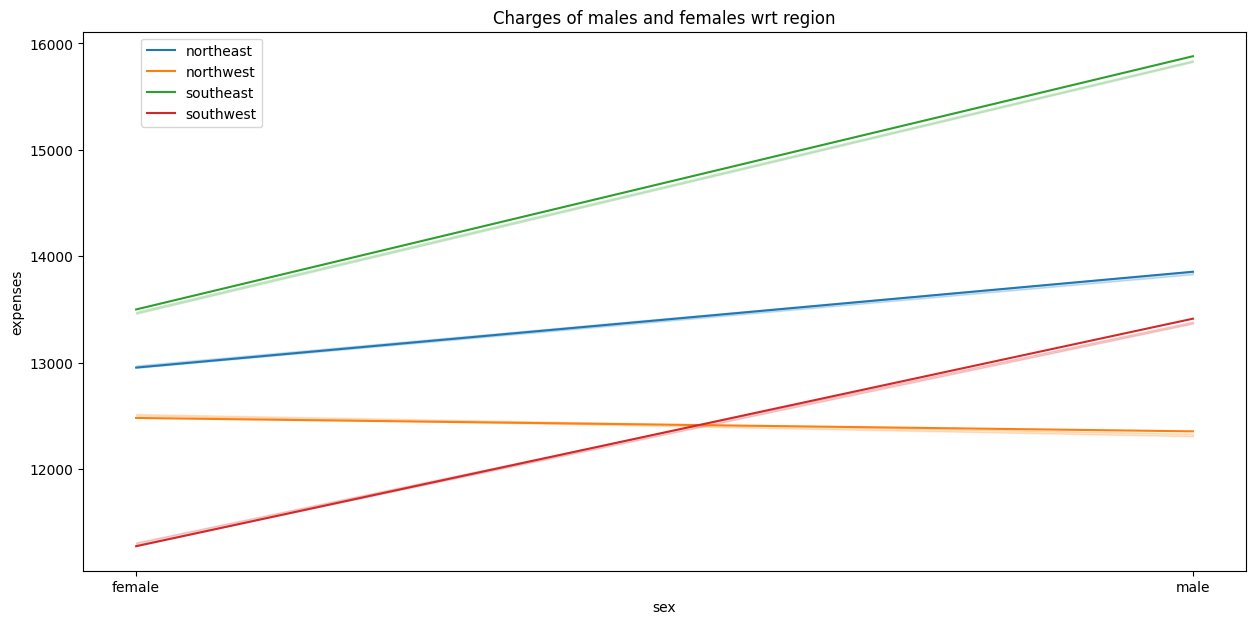

In [ ]:
#multivariate
plt.figure(figsize=(15,7))
sns.lineplot(x = insured["sex"], y =insured["expenses"],hue=insured["region"],ci=1).set(title= 'Charges of males and females wrt region')
plt.legend(bbox_to_anchor=(0.16, 1)) #x-axis and y-axis value to put legend
plt.show()

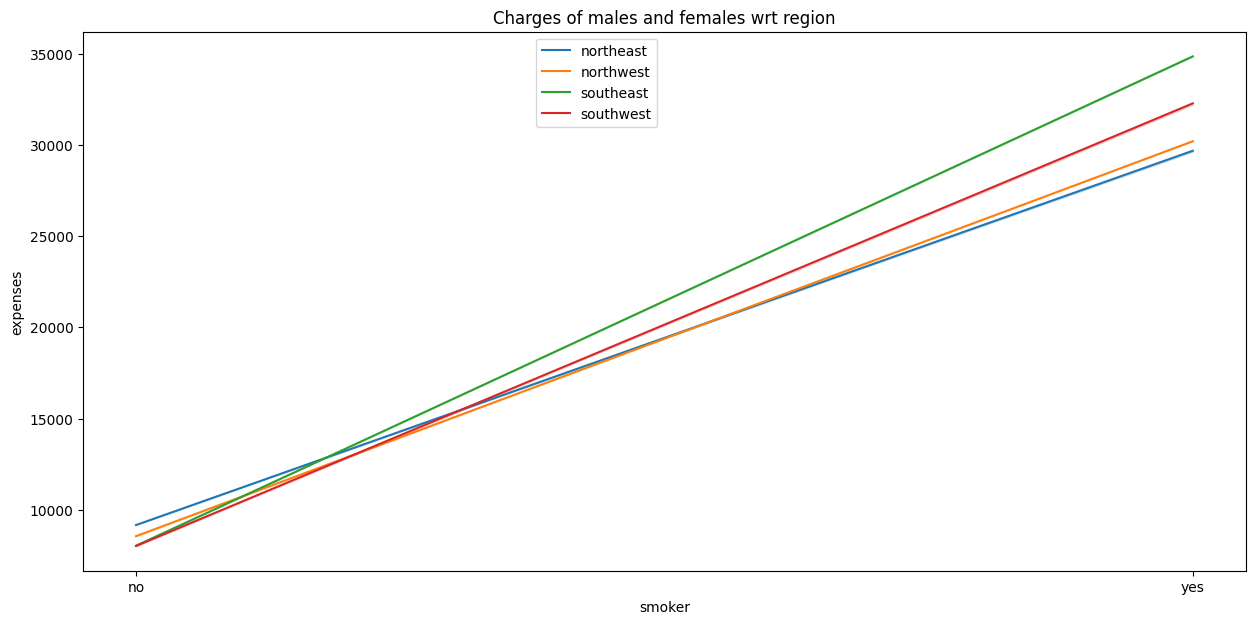

In [ ]:
#multivariate
plt.figure(figsize=(15,7))
sns.lineplot(x = insured["smoker"], y =insured["expenses"],hue=insured["region"],ci=1).set(title= 'Charges of males and females wrt region')
plt.legend(bbox_to_anchor=(0.5, 1)) #hue= category value #x-axis=category value and y_axis= numerical value
plt.show()

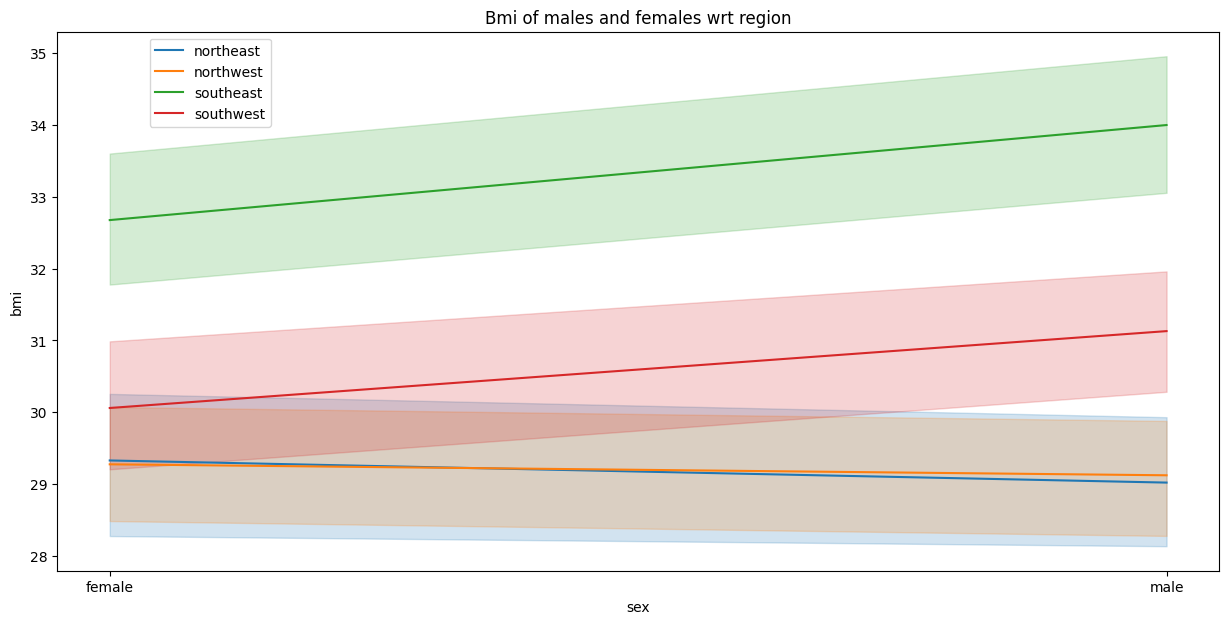

In [ ]:
#multivariate
plt.figure(figsize=(15,7))
sns.lineplot(x = insured["sex"], y =insured["bmi"],hue=insured["region"],).set(title= 'Bmi of males and females wrt region')
plt.legend(bbox_to_anchor=(0.19, 1))
plt.show()

In [ ]:
#Cross tab ...it provides dataframe
edu_gender_salary =pd.crosstab(index=insured['region'], columns=insured.sex  , values=insured.expenses, aggfunc='mean')
edu_gender_salary



sex,female,male
region,,
northeast,12953.203106,13854.005767
northwest,12479.870244,12354.119317
southeast,13499.669257,15879.617354
southwest,11274.411667,13412.884233


In [ ]:
gender_count =pd.crosstab(index=insured['region'], columns=insured.sex  , values=insured.expenses, aggfunc='count')
gender_count


sex,female,male
region,,
northeast,161,163
northwest,164,161
southeast,175,189
southwest,162,163


In [ ]:
gender_insurance=pd.crosstab(index=insured.sex, columns=insured['region']  , values=insured.expenses,aggfunc='sum')
gender_insurance

region,northeast,northwest,southeast,southwest
sex,,,,
female,2085465.70,2046698.72,2362442.12,1826454.69
male,2258202.94,1989013.21,3001247.68,2186300.13


In [ ]:
# plot directly from dataframe

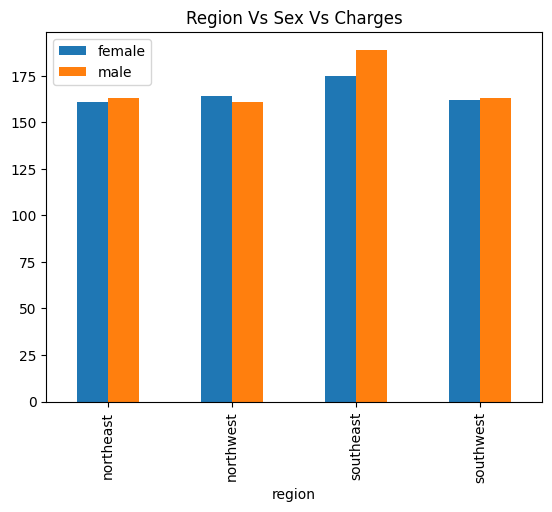

In [ ]:
edu_gender_salary.plot(kind='bar',title="Region Vs Sex Vs Expenses")
plt.legend(loc='upper left')
plt.show()

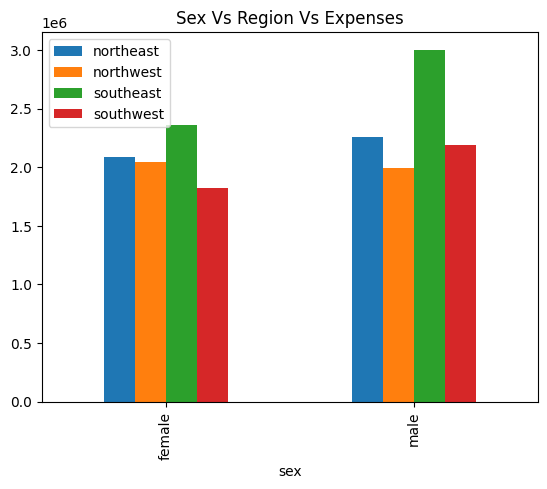

In [ ]:
gender_edu_salary.plot(kind='bar',title="Sex Vs Region Vs Expenses")
plt.legend(loc='upper left')
plt.show()

In [ ]:
# converting quantitative data to qualitative
insured

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [ ]:
insured.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [ ]:
#creating groups of age
category = pd.cut(insured.age,bins=[15,20,25,30,35,40,45,50,55,60,65],labels=['15-20','20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65'])
category
insured.insert(1,'AgeGroups',category)


ValueError: cannot insert AgeGroups, already exists

In [ ]:
insured

,age,AgeGroups,AgeGroup,sex,bmi,children,smoker,region,expenses
0,19,15-20,15-20,female,27.9,0,yes,southwest,16884.92
1,18,15-20,15-20,male,33.8,1,no,southeast,1725.55
2,28,25-30,25-30,male,33.0,3,no,southeast,4449.46
3,33,30-35,30-35,male,22.7,0,no,northwest,21984.47
4,32,30-35,30-35,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...,...,...
1333,50,45-50,45-50,male,31.0,3,no,northwest,10600.55
1334,18,15-20,15-20,female,31.9,0,no,northeast,2205.98
1335,18,15-20,15-20,female,36.9,0,no,southeast,1629.83
1336,21,20-25,20-25,female,25.8,0,no,southwest,2007.95


In [ ]:
age_group = insured.groupby(insured.AgeGroup).expenses.mean()
age_group

AgeGroup
15-20     8713.482771
20-25     9529.919643
25-30    10086.132754
30-35    10929.364692
35-40    12366.023071
40-45    14538.651241
45-50    15013.603472
50-55    16988.005500
55-60    17145.495040
60-65    21063.163407
Name: expenses, dtype: float64

In [ ]:
category1=pd.cut(insured['Years of Experience'],bins=[0,5,10,15,20],labels=['0-5','5-10','10-15','15-20'])
insured.insert(6,'Exp_group',category1)

KeyError: 'Years of Experience'

In [ ]:
insured.head()

In [ ]:
age_group.plot(kind='bar',title="Agebins vs Avg Salary")


In [ ]:
Exp_bin_cat = insured.groupby(insured.Exp_group).Salary.mean()
Exp_bin_cat

In [ ]:
Exp_bin_cat.plot(kind='bar',title="Exp_bins vs Avg Salary")


In [ ]:
#multi variate data analysis
insured.groupby(['Gender','Education Level','Exp_group']).Salary.mean()

In [ ]:
insured.groupby(['Gender','Education Level','Exp_group']).Salary.mean().unstack().plot(kind='bar',title="Exp_bins vs Avg Salary")

In [ ]:
insured.groupby(['Gender','Education Level','Exp_group']).Salary.mean().unstack().plot(kind='bar',title="Exp_bins vs Avg Salary")

In [ ]:
insured.groupby(['Education Level','Gender','Exp_group']).Salary.mean().unstack().plot(kind='bar',title="Exp_bins vs Avg Salary")

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x=insured["Education Level"],y=insured["Salary"],hue=insured['Gender'],ci=0).set(title= 'Age and Bmi of Males and Females')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

In [ ]:
sns.barplot(x='Education Level',y='expenses',hue='sex',data=insured).set(title="Fig 2:BMI group and Charges " )

In [ ]:
sns.relplot(x=insured['Years of Experience'], y=insured["Salary"], hue=insured['Gender'], size=  insured['Education Level'],
            sizes=(40, 400), palette="spring",
            height=6, data=insured).set(title='Salary by Education Level,Gender,Experience');

In [ ]:
insured

In [ ]:
sns.relplot(x=insured['Salary'], y=insured['Years of Experience'], hue=insured['Gender'], size=  insured['Education Level'],
            sizes=(40, 400), palette="spring",
            height=6, data=insured).set(title='Salary by Education Level,Gender,Experience');

# Statistical Analysis

# 1.Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?

<div class ="alert alert-block alert-info">

---


    <font size=3><b>    Step 1: Define null and alternative hypothesis</b></font><br>
$\ H_0  :  \mu_1 <= \mu_2  $ The average charges of smokers is less than or equal to nonsmokers
 <br>


$\ H_a  :\mu_1 > \mu_2 $ The average charges of smokers is greater than nonsmokers  <br>
</div>

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 2: Decide the significance level. If P values is less than alpha reject the null hypothesis.</b></font>

α = 0.05

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 3: Identify the test</b></font>

Standard deviation of the population is not known  ,will perform a T stat test .  The > sign in alternate hypothesis indicate  test is right tailed, that is all z values that would cause us to reject null hypothesis are in just one tail to the right of  sampling  distribution curve.

    


<div class ="alert alert-block alert-info">
    <font size=3><b>Step 4: Calculate the test-statistics and p-value</b></font>

In [ ]:
smoker=insured.loc[insured.smoker=="yes"]
smoker.head()

In [ ]:
smoker.count()

In [ ]:
nonsmoker=insured.loc[insured.smoker=='no']
nonsmoker.head()

In [ ]:
nonsmoker.count()

In [ ]:
# Adjusting the size of the rows to be equal
nonsmoker = nonsmoker[0:274]
charges_yes = smoker.expenses
charges_no = nonsmoker.expenses

In [ ]:
print(f'Average Cost charged to Insurance for smoker is {charges_yes.mean()} and nonsmoker is {charges_no.mean()} ')


In [ ]:
#smoker vs charges
sns.boxplot(x=insured.expenses,y=insured.smoker,data=insured).set(title="Fig:1 Smoker vs Charges")

In [ ]:
charges_no

In [ ]:
alpha = 0.05
t_statistic_1, p_value_1 = stats.ttest_ind(charges_yes, charges_no)
p_value_onetail=p_value_1/2

print("Test statistic = {} , Pvalue ={} , OnetailPvalue = {}".format(t_statistic_1,p_value_1, p_value_onetail ))


In [ ]:
if p_value_1 < alpha :
    print(f"Conclusion:Since P value {p_value_onetail} is less than alpha {alpha} " )
    # print("Reject Null Hypothesis that Average charges for smokers are less than or equal to nonsmoker.")

else:
    print("Conclusion:Since P value {} is greater than alpha {} ". format (p_value_onetail,alpha))
    # print("Failed to Reject Null Hypothesis that Average charges for smokers are less than nonsmoker.")

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 5: Decide whethere to  reject or failed to reject null hypothesis</b></font><br>    
    We reject the null hypothesis and can conclude that people who smoke have on an average larger medical claim compared to people who don't smoke. Similar result can also been seen in Fig no.1 Smokers Vs Charges

# 2.Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.

<div class ="alert alert-block alert-info">
    Let $\mu_1 \mu_2 $ and be the respective population means for BMI of males and BMI of females<br>
    <font size=3><b>    Step 1: Define null and alternative hypothesis</b></font><br>
$\ H_0  : \mu_1 - \mu_2 = 0$ There is no difference between the BMI of Male  and BMI of female.<br>
$\ H_a  : \mu_1 - \mu_2 !=0 $ There is difference between the BMI of Male and BMI of female. <br>


</div>

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 2: Decide the significance level</b></font>

α = 0.05

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 3:Identify the test</b></font><br>Standard deviation of the population is not known ,will perform a T stat test.Not equal to sign in alternate hypothesis indicate its a two tailed test.

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 4: Calculate the test-statistics and p-value</b></font>

In [ ]:
#get all observation for male.
df_male=insured.loc[insured.sex=="male"]
#get all observation for females
df_female=insured.loc[insured.sex=="female"]


In [ ]:
#get bmi of male and female
bmi_female=df_female.bmi
bmi_male=df_male.bmi

In [ ]:
sns.distplot(bmi_male,color='green',hist=False)
sns.distplot(bmi_female,color='red',hist=False)


In [ ]:
df_female.bmi.mean()

In [ ]:
df_male.bmi.mean()

In [ ]:
# get statistic and p value
t_statistic_2, p_value_2 = stats.ttest_ind(bmi_male, bmi_female)
print("tstats = ",t_statistic_2, ", pvalue = ", p_value_2)

In [ ]:
if p_value_2 <alpha :
    print("Conclusion:Since P value {} is less than alpha {} ". format (p_value_2,alpha) )
    print("Reject Null Hypothesis  that there is no difference in bmi of men and bmi of female.")

else:
    print("Conclusion:Since P value {} is greater than alpha {} ". format (p_value_2,alpha))
    print("Failed to Reject Null Hypothesis  that there is difference in bmi of men and bmi of female .")


<div class ="alert alert-block alert-info">
    <font size=3><b>Step 5: Decide to reject or accept null hypothesis</b></font><br>
     We fail to reject the null hypothesis and can conclude that There is no difference between BMI of Female and BMI of Male.

### Recommendation
- Based on EDA and statistical  evidence it can be seen that  customer who smoke or   have higher  BMI  have more higher claims. We can encourage customers to quit smoking by providing them  incentive points  for talking to life coach, get help for improving lifestyle habits,  Quit Tobacco- 28 day program. Give gift cards when customer accumulates specific number of points.
- We can have Active wellness programs which can help up reduce claims related to BMI.
- High BMI  is primarily because of unhealthy life choices. We can provide customers with Diet plans and wellness health coaches which can help them to make right choices.
- Provide discount coupons  for Gym  or  fitness devices encouraging customers to exercise.
